In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from itertools import chain
from sklearn.model_selection import train_test_split
# importing ploting libraries
from scipy.stats import zscore
from sklearn import metrics
import seaborn as sns

from scipy.stats import chisquare,chi2_contingency

from sklearn.preprocessing import Normalizer
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
bank = pd.read_csv("Churn_Modelling.csv")

In [0]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
bank.shape

(10000, 14)

In [0]:
bank.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa14cc53ac8>,
      dtype=object)

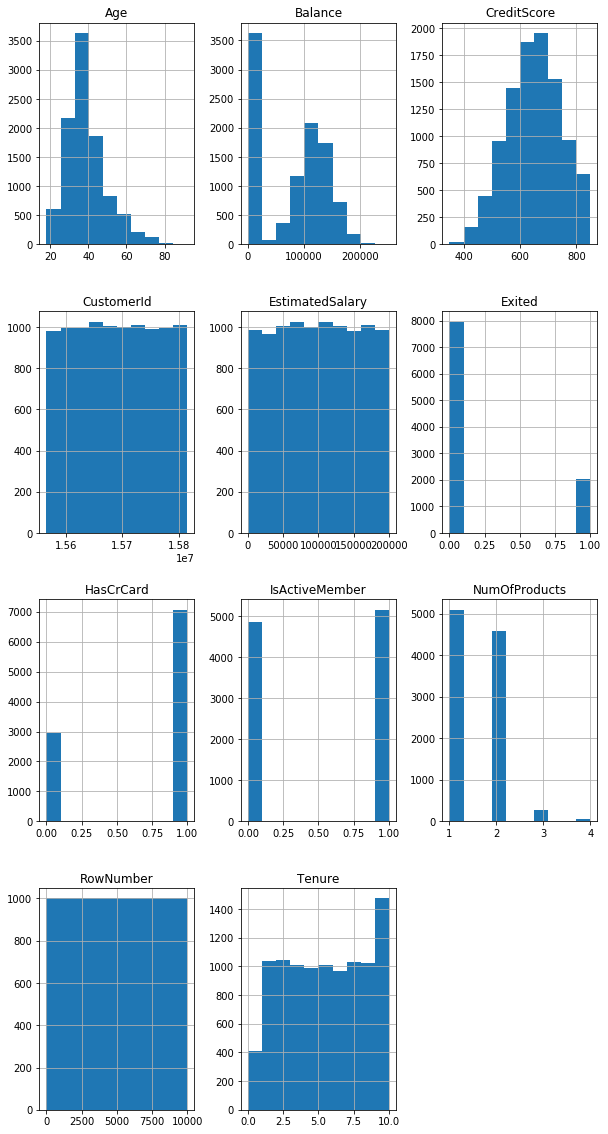

In [0]:
bank.hist(layout = (4,3),figsize = (10,20))

In [0]:
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


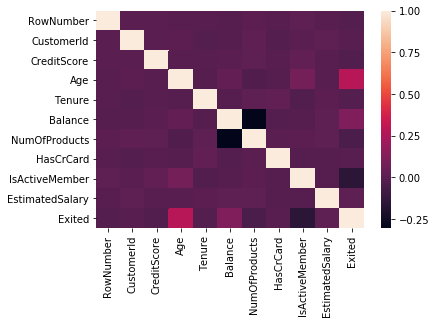

In [0]:
bank.corr()
bank_corr = bank.corr()
sns.heatmap(bank_corr, 
        xticklabels=bank_corr.columns,
        yticklabels=bank_corr.columns)

In [0]:
independent_dependent = bank.corr()["Exited"]
independent_independent = bank.drop("Exited",axis =1).corr()

In [0]:
for k in independent_dependent:
    if (-0.1 <= k <= 0.1):
        print ("Independent vs Dependent Weak Correlation found ",k)

Independent vs Dependent Weak Correlation found  -0.016571371463985185
Independent vs Dependent Weak Correlation found  -0.006247986637818954
Independent vs Dependent Weak Correlation found  -0.027093539754658398
Independent vs Dependent Weak Correlation found  -0.014000612253444792
Independent vs Dependent Weak Correlation found  -0.04781986494944309
Independent vs Dependent Weak Correlation found  -0.007137765603039506
Independent vs Dependent Weak Correlation found  0.012096861026845011


In [0]:
print("Correlation analyis between Independent Features")
for l, l_val in enumerate (independent_independent.columns):
    for k, values in enumerate(independent_independent.iloc[:,l]):
        if values > 0.79:
            print(independent_independent.index[k],"-",l_val,"-", independent_independent.iloc[k,l])

Correlation analyis between Independent Features
RowNumber - RowNumber - 1.0
CustomerId - CustomerId - 1.0
CreditScore - CreditScore - 1.0
Age - Age - 1.0
Tenure - Tenure - 1.0
Balance - Balance - 1.0
NumOfProducts - NumOfProducts - 1.0
HasCrCard - HasCrCard - 1.0
IsActiveMember - IsActiveMember - 1.0
EstimatedSalary - EstimatedSalary - 1.0


In [0]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


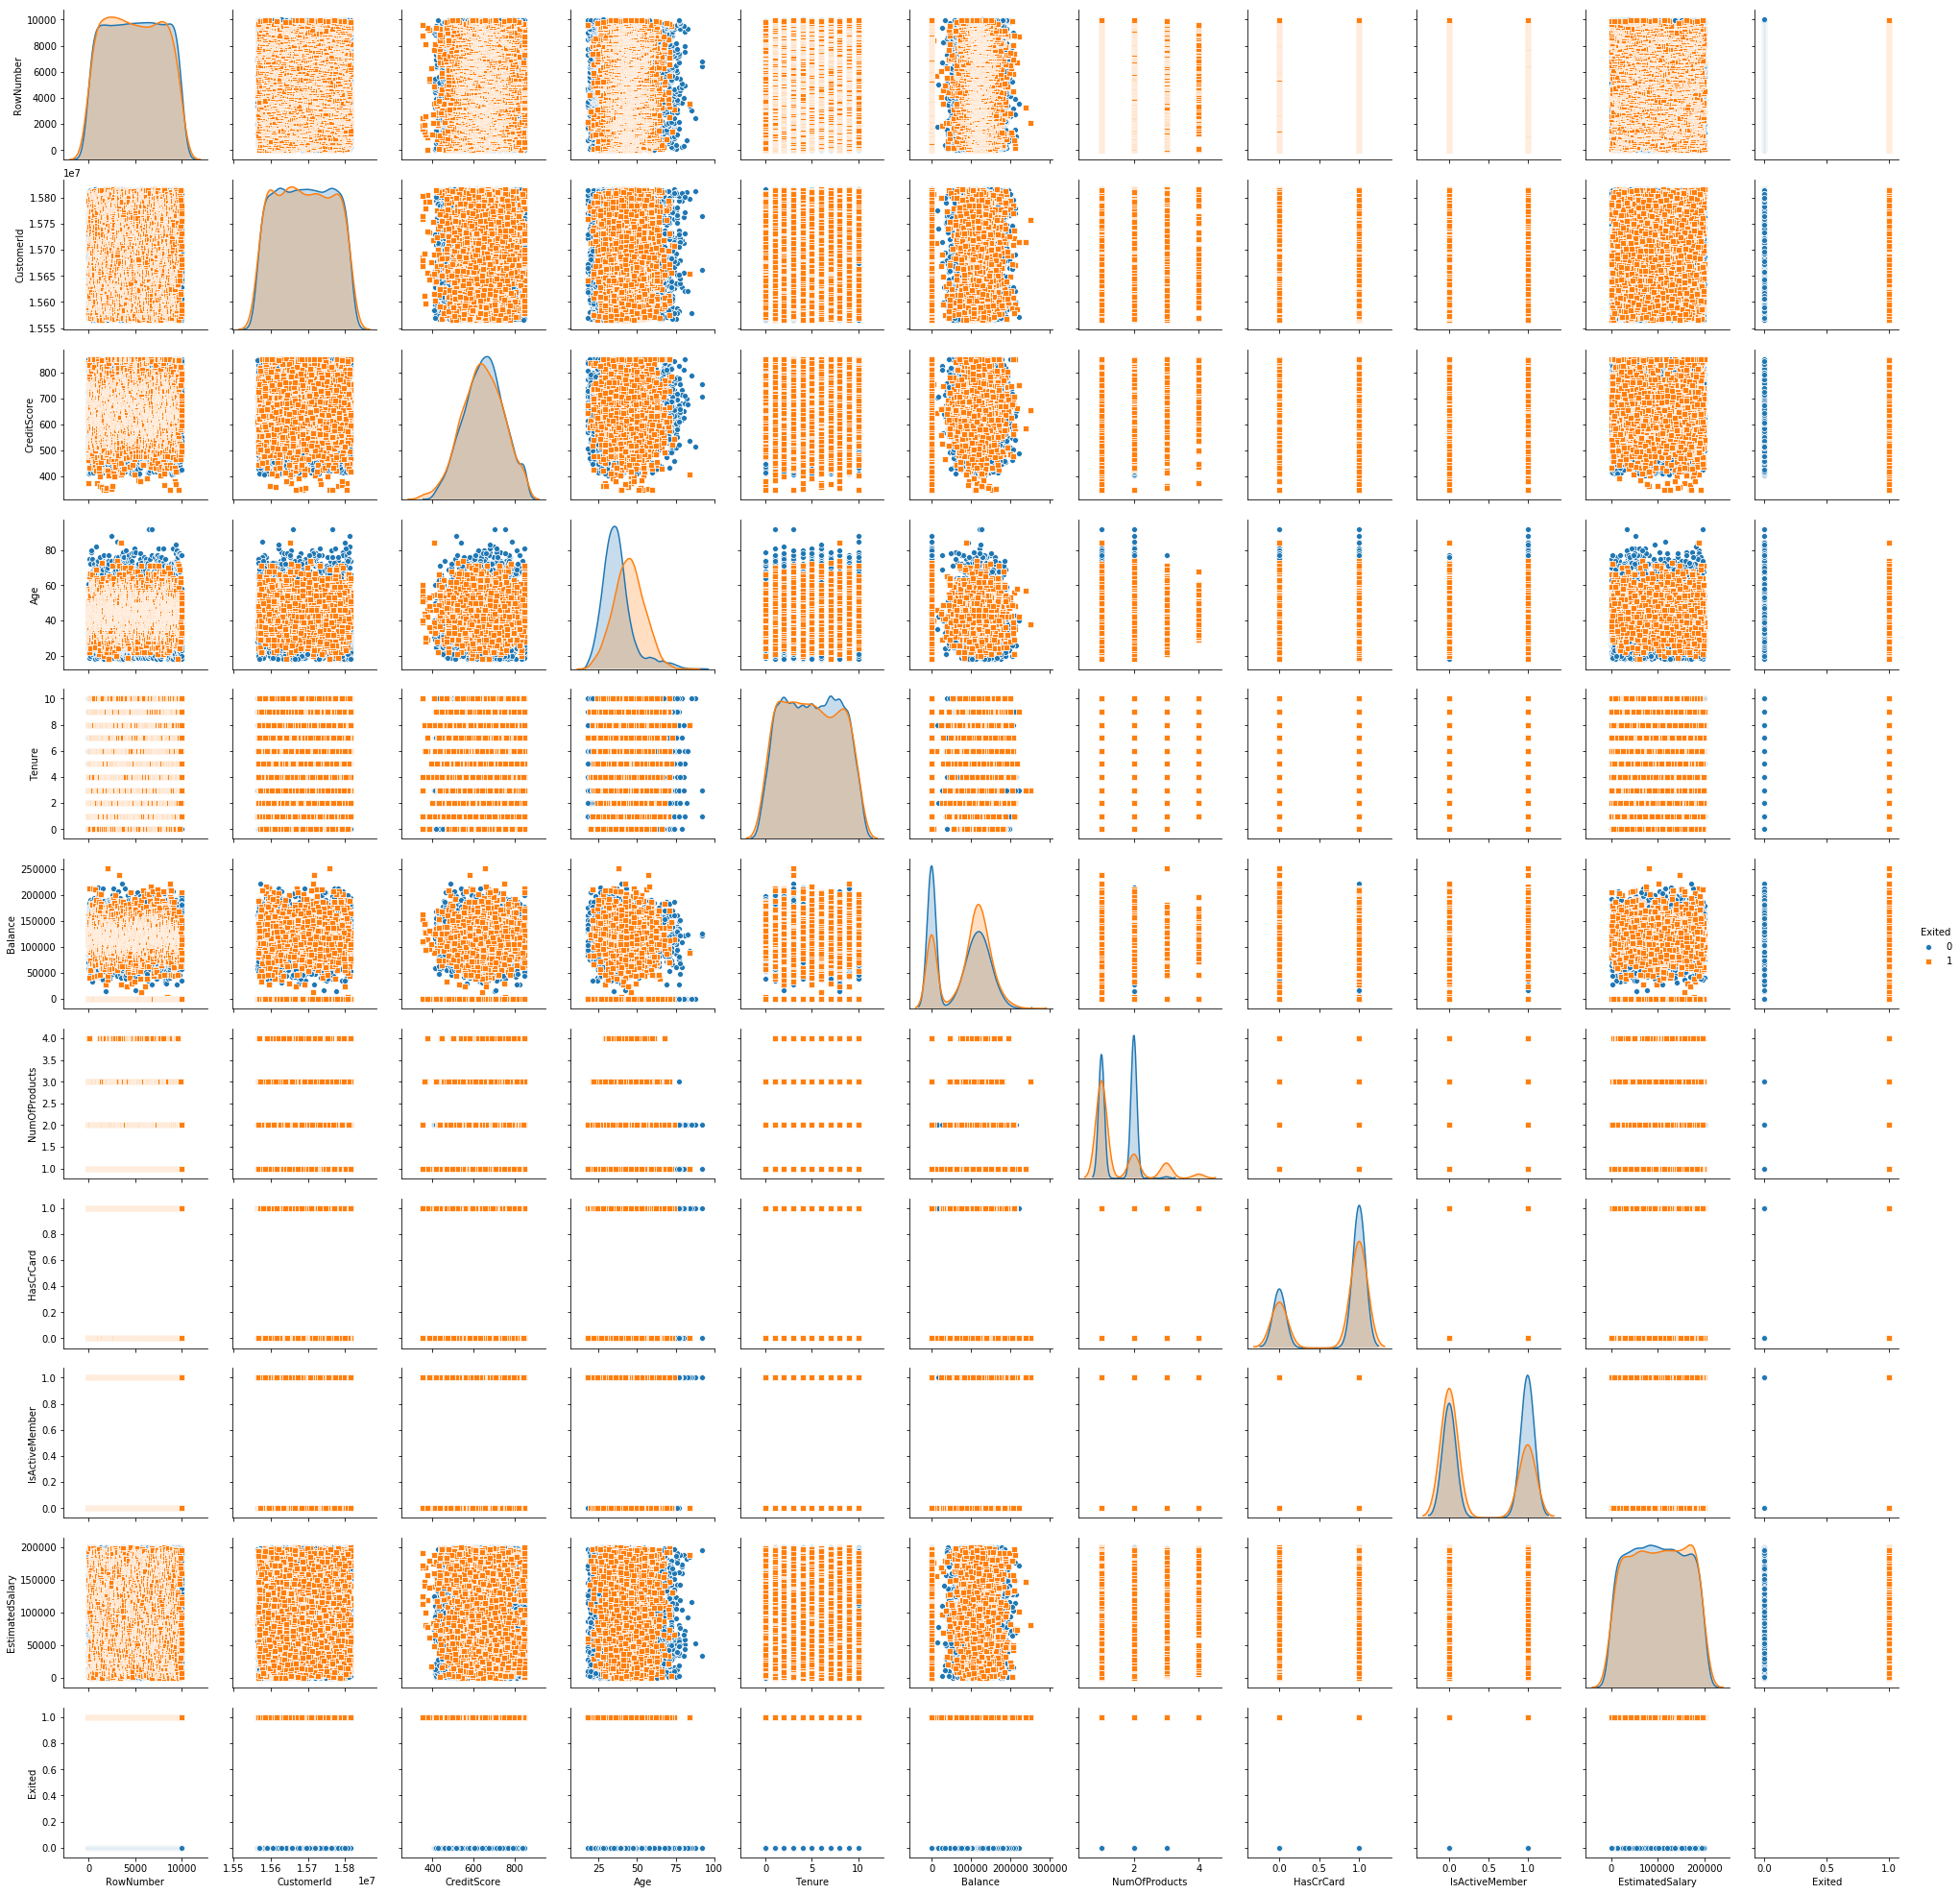

In [0]:

sns.pairplot(bank,hue = "Exited",markers= ["o", "s"])

#print("Class as integer with converstion")
#sns.pairplot(iris_dset,hue = "Class_Code",markers= ["o", "s", "D"])


In [0]:
print("on looking the Kde only Age seems to be helps in identifying the Classes as rest are almost overlapped")

on looking the Kde only Age seems to be helps in identifying the Classes as rest are almost overlapped


In [0]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
print("Dropping row number, customer id, surname")

Dropping row number, customer id, surname


In [0]:
bank.drop(columns = ["RowNumber","CustomerId","Surname"], axis =1, inplace =True)

In [0]:
bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

we need to conver the categorial variables


In [0]:
bank["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [0]:
dummy_geo =  pd.get_dummies(bank["Geography"],prefix=['Geo'])

In [0]:
dummy_gen =  pd.get_dummies(bank["Gender"],prefix=['Gender'])

In [0]:
bank_new = pd.concat([bank, dummy_geo,dummy_gen],axis=1)

In [0]:
bank_new.drop(columns = ["Gender","Geography"], inplace =True, axis = 1)

In [0]:
bank_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,['Geo']_France,['Geo']_Germany,['Geo']_Spain,['Gender']_Female,['Gender']_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [0]:
X = bank_new.drop(columns = ["Exited"])
y = bank_new["Exited"]
#transformer = Normalizer()
#X = transformer.fit_transform(X)

In [0]:
bank_new.shape

(10000, 14)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 15,stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
#model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10,kernel_initializer='uniform',input_shape=(13,)))
#model.add(input_dim=(4,))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(5,kernel_initializer='uniform', activation='relu'))

#Add Dense Layer which provides 1 Outputs after applying softmax
model.add(tf.keras.layers.Dense(1,kernel_initializer='uniform', activation='sigmoid'))

#Comile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#tf.keras.optimizers.SGD(lr=0.001)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
 
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
#model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)
#model.fit(X_train, y_train,validation_data=(X_train, y_train),epochs=100,batch_size = 40,callbacks=callbacks_list)
model.fit(X_train, y_train,validation_data=(X_train, y_train),epochs=100,batch_size = 40)

Train on 8000 samples, validate on 8000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 82us/sample - loss: 0.5792 - acc: 0.7947 - val_loss: 0.4803 - val_acc: 0.7962
Epoch 2/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.4611 - acc: 0.7962 - val_loss: 0.4554 - val_acc: 0.7962
Epoch 3/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.4526 - acc: 0.7962 - val_loss: 0.4399 - val_acc: 0.7962
Epoch 4/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.4387 - acc: 0.7962 - val_loss: 0.4320 - val_acc: 0.7962
Epoch 5/100
8000/8000 [==============================] - 0s 50us/sample - loss: 0.4352 - acc: 0.7962 - val_loss: 0.4290 - val_acc: 0.7962
Epoch 6/100
8000/8000 [==============================] - 0s 50us/sample - loss: 0.4314 - acc: 0.7962 - val_loss: 0.4265 - val_acc: 0.7962
Epoch 7/100
8000/8000 [==============================] - 0s 50us/sample - lo

In [0]:

y_pred = model.predict(X_test)
print(y_pred)




[[0.79155755]
 [0.00973511]
 [0.16676986]
 ...
 [0.79155755]
 [0.0066658 ]
 [0.04780212]]


In [0]:
len(y_pred)

2000

In [0]:
y_pred = (y_pred > 0.5)
print(y_pred)#Data now changed to True or false - binary or else we get "Classification metrics can't handle a mix of binary and continuous targets" error
test_loss, test_acc = model.evaluate(x=X_test,y=y_test)
print("Accuracy: ",test_acc)
print("Loss: ",test_loss)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]
2000/2000 [==============================] - 0s 26us/sample - loss: 0.3302 - acc: 0.8635
Accuracy:  0.8635
Loss:  0.33019016790390016
Confusion matrix:
 [[1551   42]
 [ 231  176]]


In [0]:
len(y_pred)

2000